In [247]:
print("Hello world!")

Hello world!


In [248]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [249]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [250]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [251]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [252]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [253]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


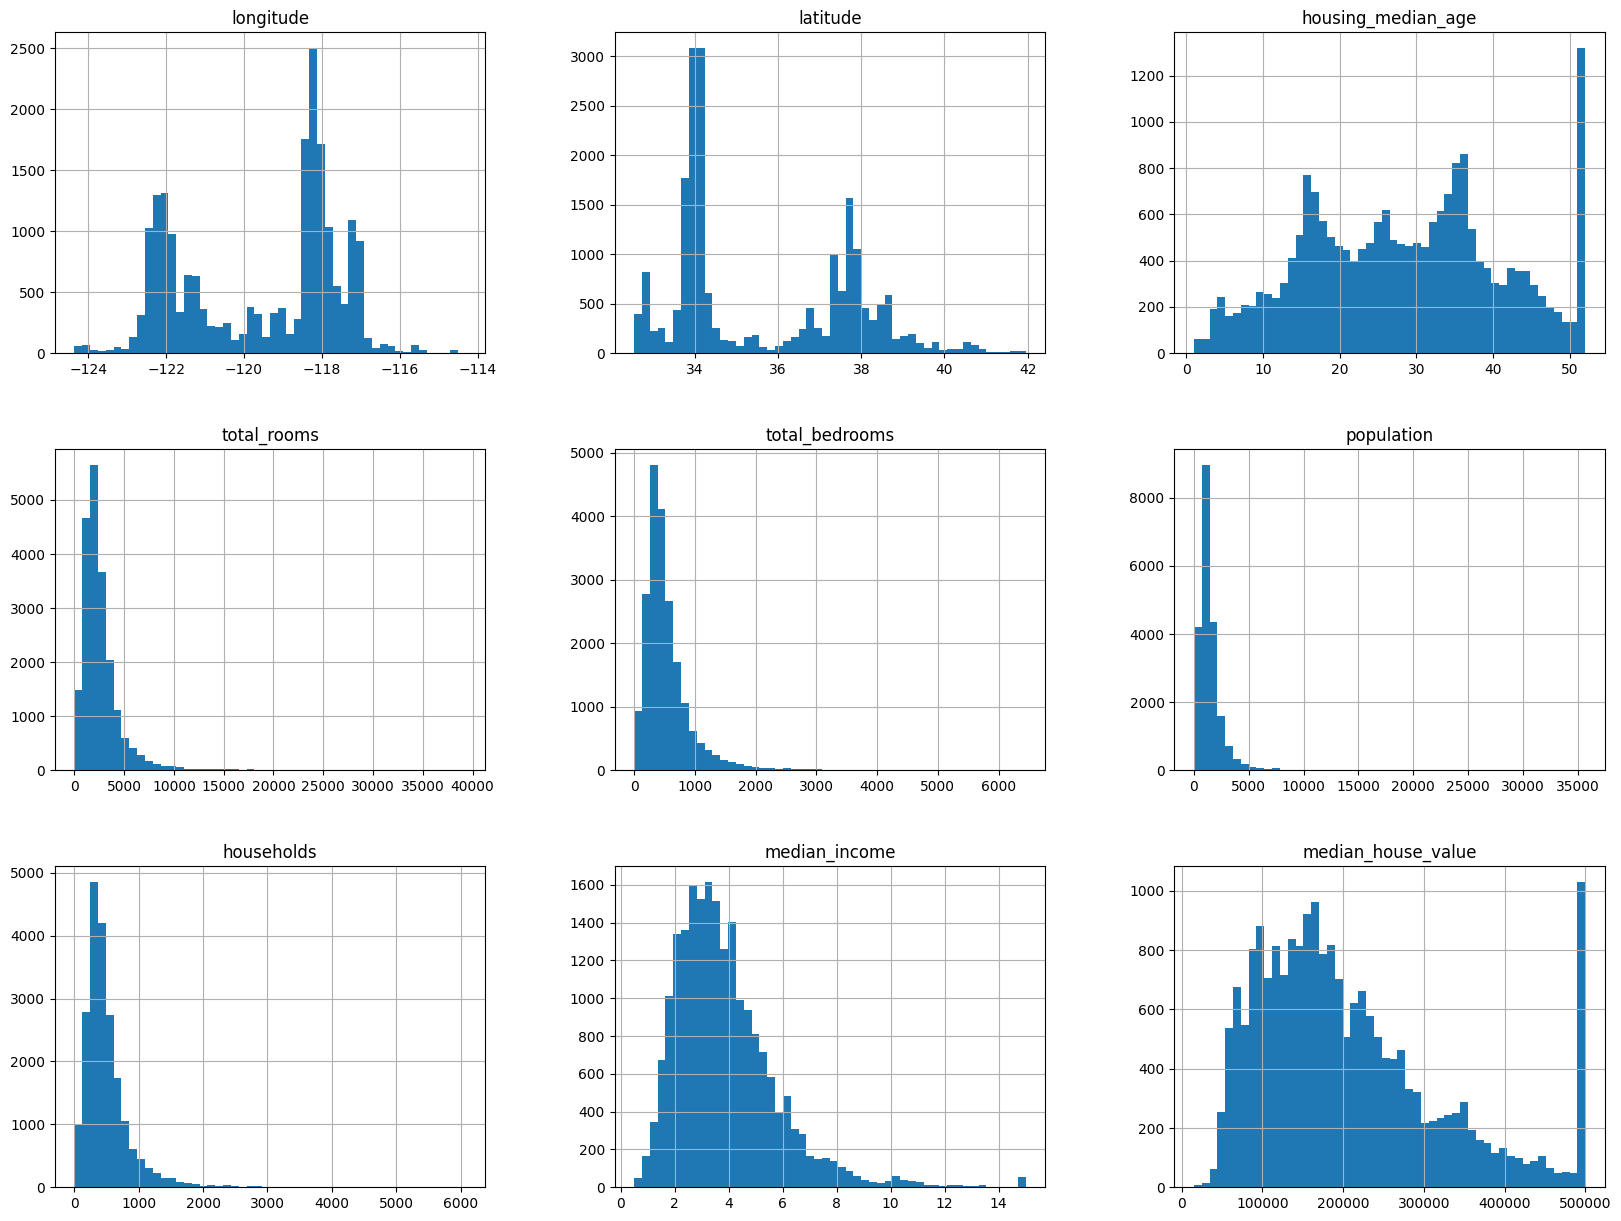

In [254]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [255]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train + ", len(test_set), "test")    

16512 train +  4128 test


In [256]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [257]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

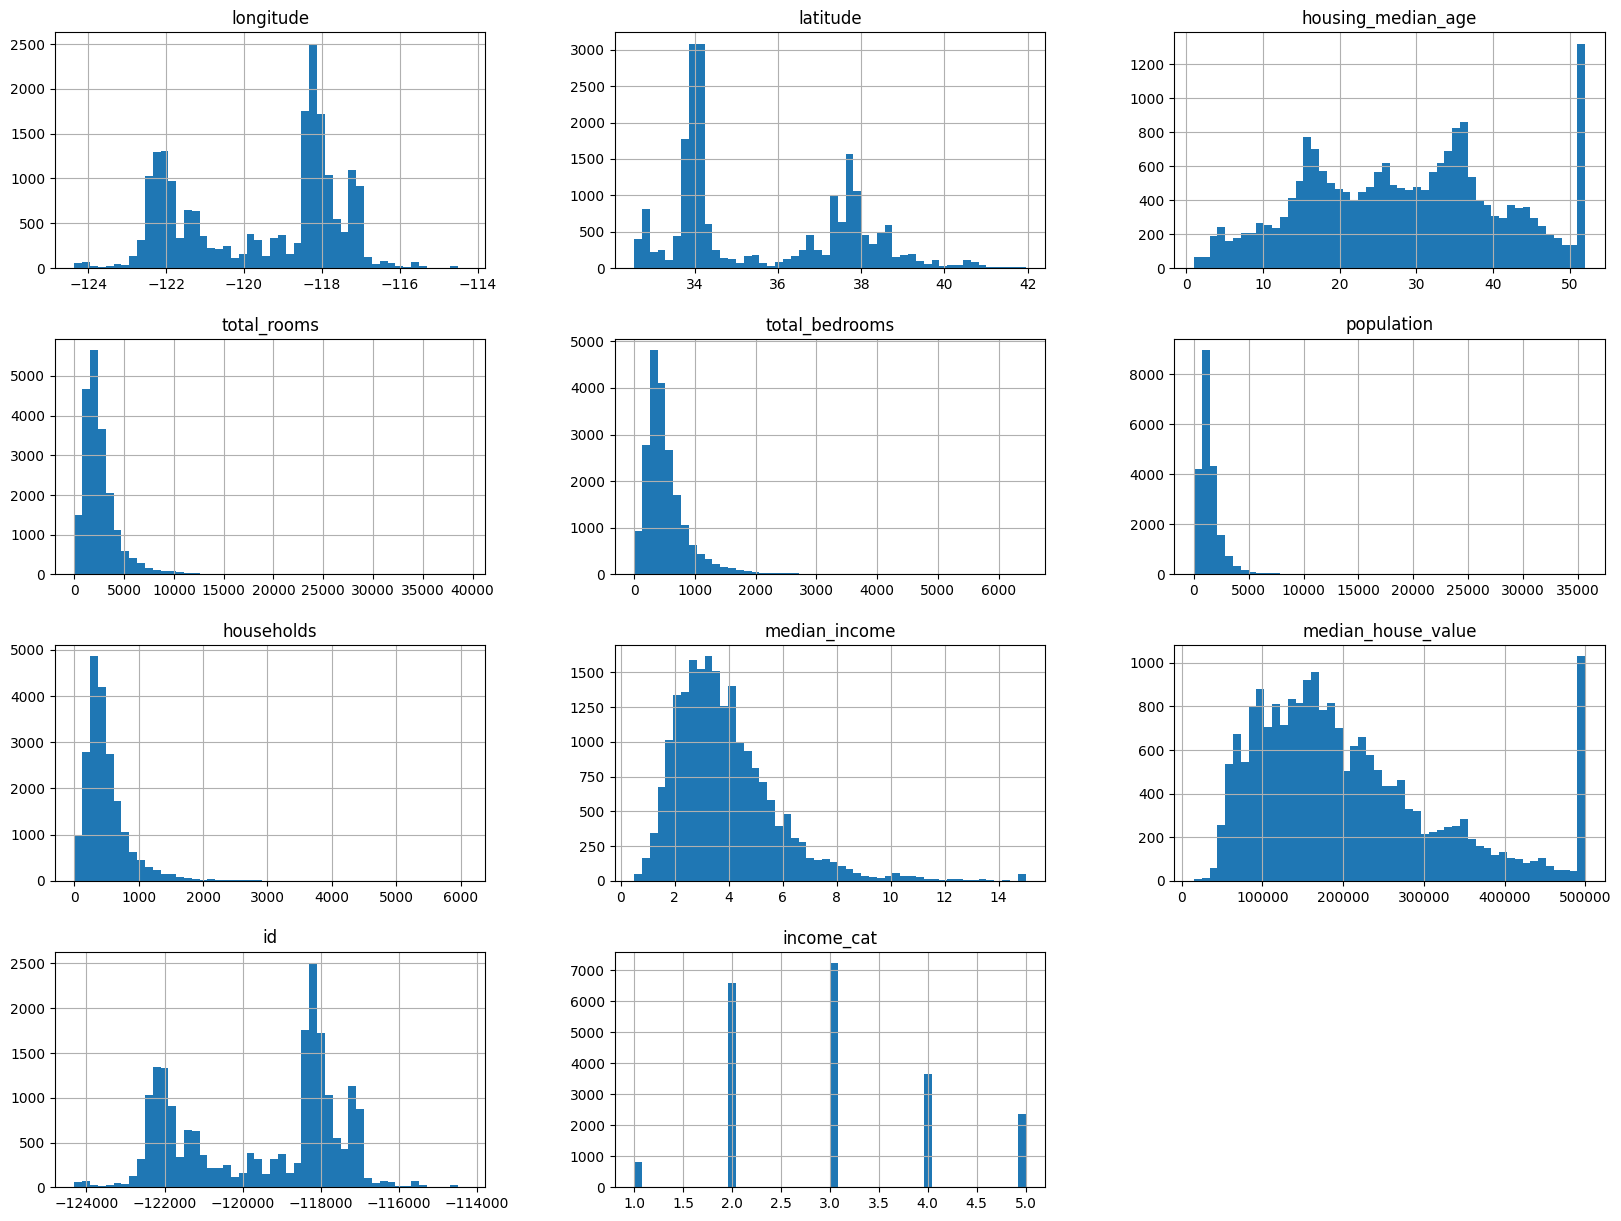

In [258]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

housing.hist(bins=50, figsize=(20,15))
plt.show()

In [259]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_i, test_i in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_i]
    strat_test_set = housing.loc[test_i]

In [260]:
strat_test_set.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity  id          income_cat
-124.18    40.78     33.0                1076.0       222.0           656.0       236.0       2.5096         72200.0             NEAR OCEAN       -124139.22  2.0           1
-118.18    34.05     38.0                3272.0       731.0           3299.0      726.0       2.8295         126500.0            <1H OCEAN        -118145.95  2.0           1
           33.83     39.0                3622.0       745.0           1330.0      648.0       3.3125         425500.0            NEAR OCEAN       -118146.17  3.0           1
                     44.0                1497.0       277.0           542.0       274.0       5.0052         321800.0            NEAR OCEAN       -118146.17  4.0           1
           33.87     38.0                2664.0       626.0           1627.0      604.0       3.7527         161900.0            <1H OC

In [261]:
strat_train_set.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity  id          income_cat
-124.35    40.54     52.0                1820.0       300.0           806.0       270.0       3.0147         94600.0             NEAR OCEAN       -124309.46  3.0           1
-118.19    34.05     43.0                977.0        266.0           1084.0      259.0       2.7708         127900.0            <1H OCEAN        -118155.95  2.0           1
           34.03     27.0                1346.0       340.0           1177.0      295.0       1.7995         153400.0            <1H OCEAN        -118155.97  2.0           1
                     31.0                525.0        136.0           627.0       145.0       2.6964         125000.0            <1H OCEAN        -118155.97  2.0           1
                     52.0                1053.0       246.0           1036.0      249.0       2.1071         136700.0            <1H OC

In [262]:
housing["income_cat"].value_counts()

income_cat
3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: count, dtype: int64

In [263]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [264]:
housing = strat_train_set.copy()

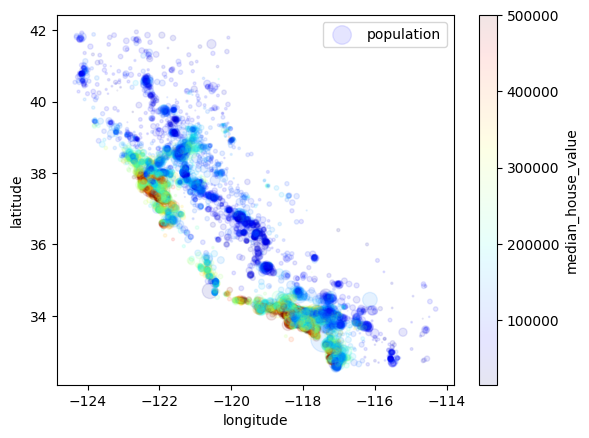

In [265]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, 
    s=housing["population"]/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True
)
plt.legend()

<Axes: xlabel='median_house_value', ylabel='median_income'>

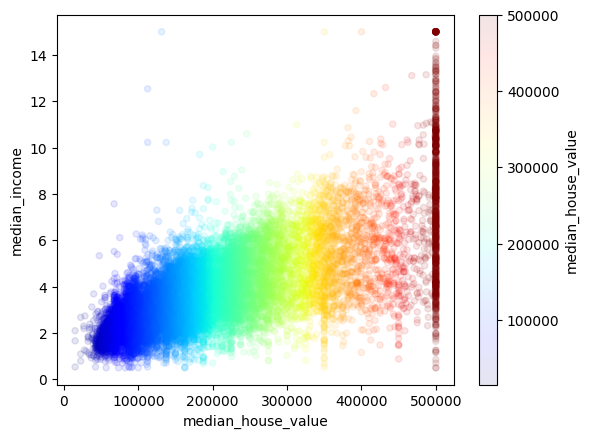

In [266]:
housing.plot(kind="scatter", y="median_income", x="median_house_value", alpha=0.1, c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

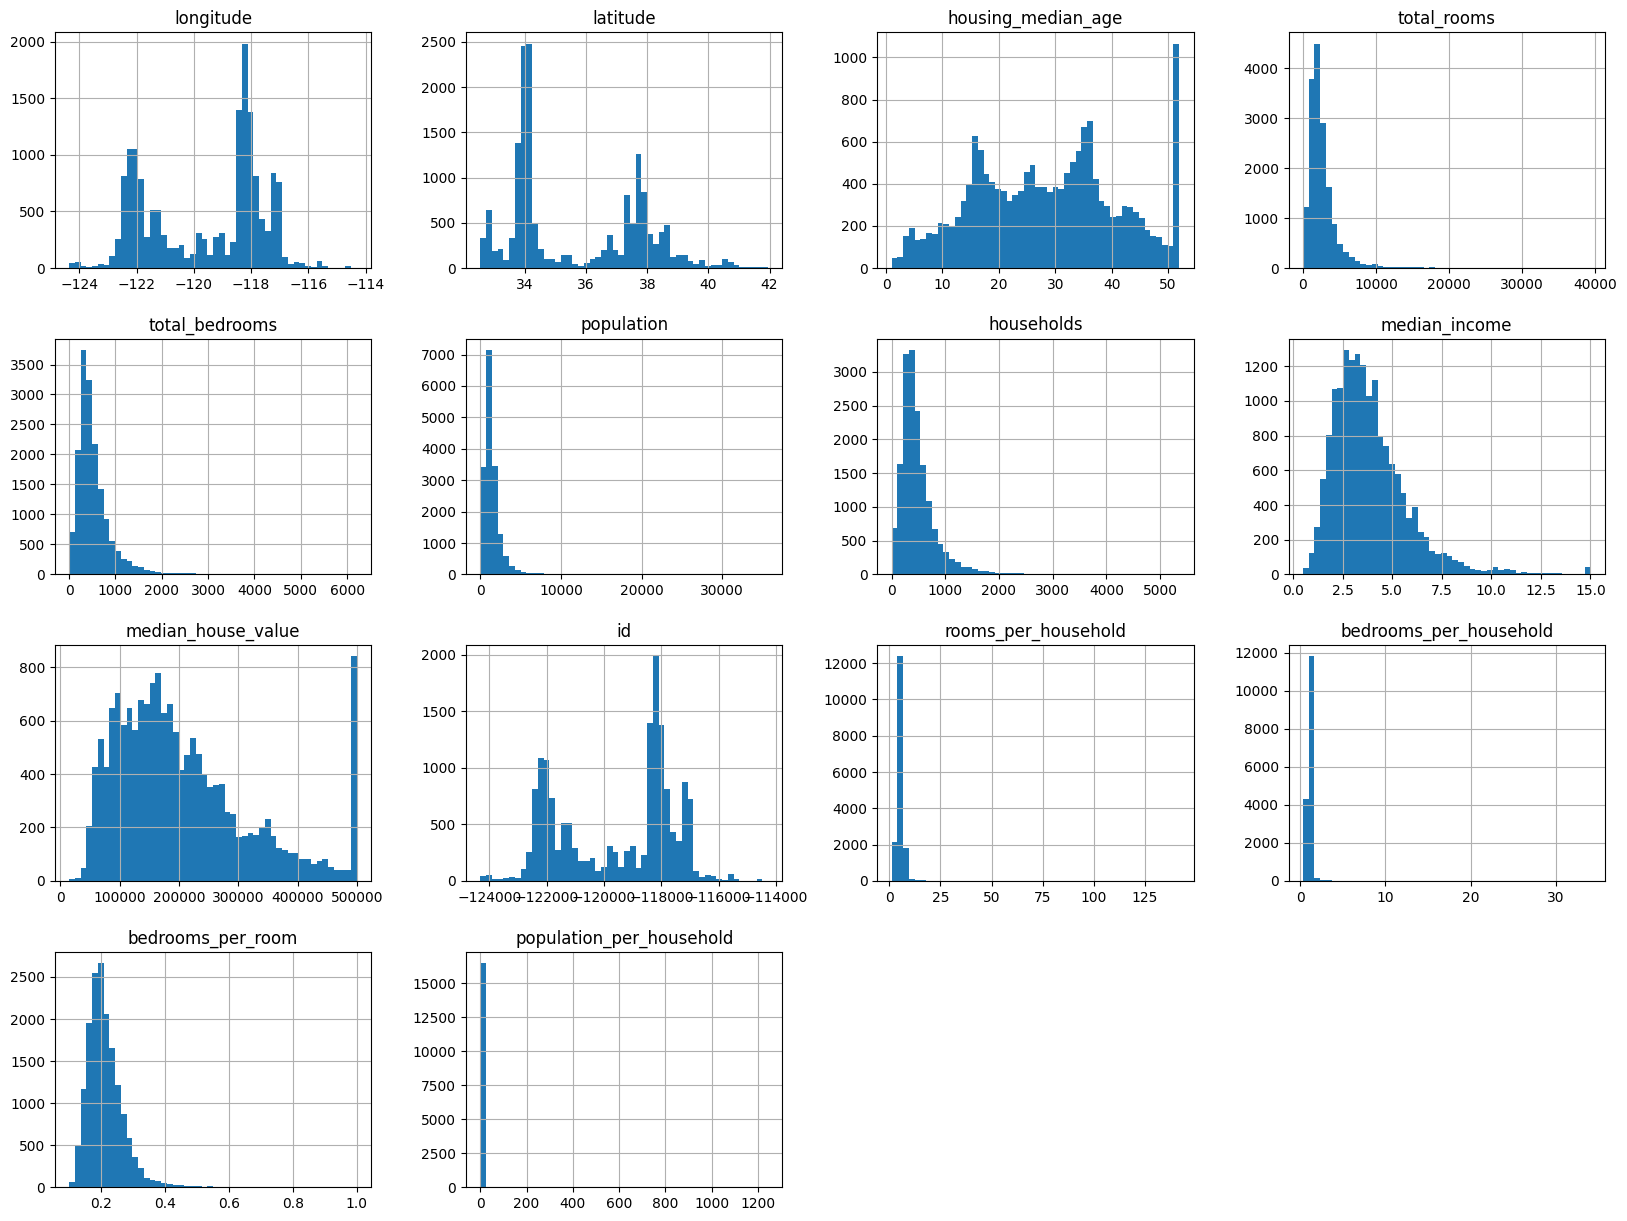

In [267]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

housing.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='median_income', ylabel='population_per_household'>

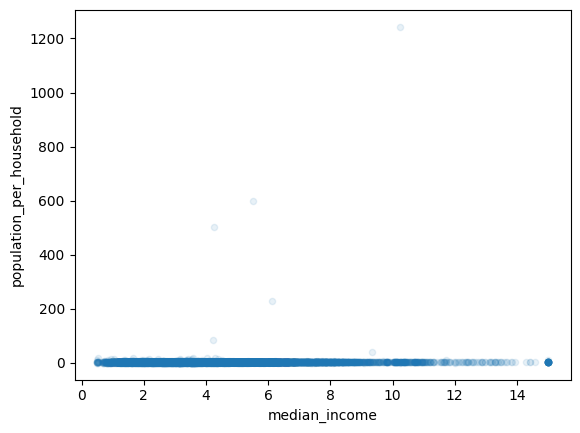

In [268]:
housing.plot(kind="scatter", y="population_per_household", x="median_income", alpha=0.1)

In [269]:
housing["population_per_household"].value_counts()

population_per_household
3.000000      26
2.500000      17
2.666667      15
2.000000      14
2.333333      11
              ..
5.252941       1
599.714286     1
4.074809       1
3.671233       1
3.172589       1
Name: count, Length: 15254, dtype: int64

<Axes: xlabel='median_income', ylabel='population_per_household_rounded'>

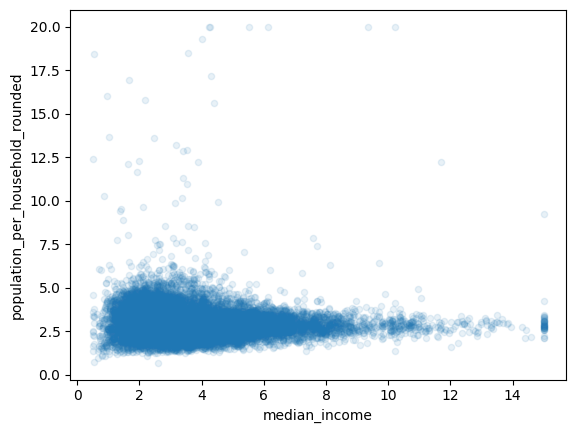

In [270]:
housing["population_per_household"] = housing["population"]/housing["households"]
housing["population_per_household_rounded"] = housing["population_per_household"]
housing["population_per_household_rounded"].where(housing["population_per_household"] < 20, 20, inplace=True)

housing.plot(kind="scatter", y="population_per_household_rounded", x="median_income", alpha=0.1)

<Axes: xlabel='median_income', ylabel='rooms_per_household'>

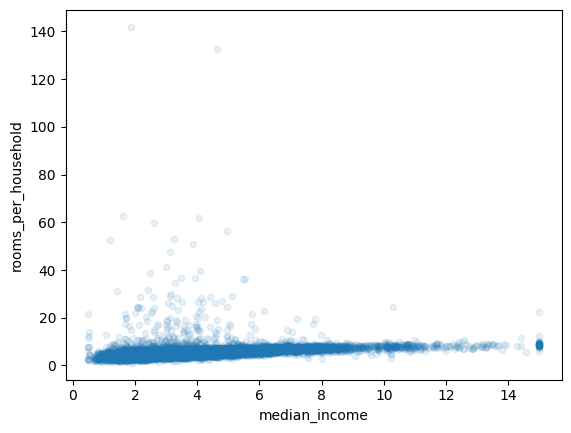

In [271]:
housing.plot(kind="scatter", x="median_income", y="rooms_per_household", alpha=0.1)

In [272]:
housing_two = housing.drop(["ocean_proximity"], axis=1)
#housing_two.drop(["ocean_proximity"], axis=1, inplace=True)

corr_matrix = housing_two.corr()
corr_matrix["median_income"].sort_values(ascending=False)

median_income                       1.000000
median_house_value                  0.687151
rooms_per_household                 0.311528
total_rooms                         0.200133
population_per_household            0.021815
households                          0.010869
population                          0.002421
total_bedrooms                     -0.009643
longitude                          -0.019615
id                                 -0.019715
population_per_household_rounded   -0.053755
bedrooms_per_household             -0.058923
latitude                           -0.075146
housing_median_age                 -0.111315
bedrooms_per_room                  -0.624650
Name: median_income, dtype: float64

In [273]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,rooms_per_household,bedrooms_per_household,bedrooms_per_room,population_per_household,population_per_household_rounded
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,-121421.48,5.485836,1.128895,0.205784,3.168555,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,-117196.91,6.927083,1.113281,0.160714,2.623698,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,-119004.63,5.393333,1.033333,0.191595,2.223333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,-117097.25,3.886128,1.074534,0.276505,1.859213,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,-118665.72,6.096552,1.113793,0.182692,3.167241,3.167241


<Axes: xlabel='median_income', ylabel='bedrooms_per_room'>

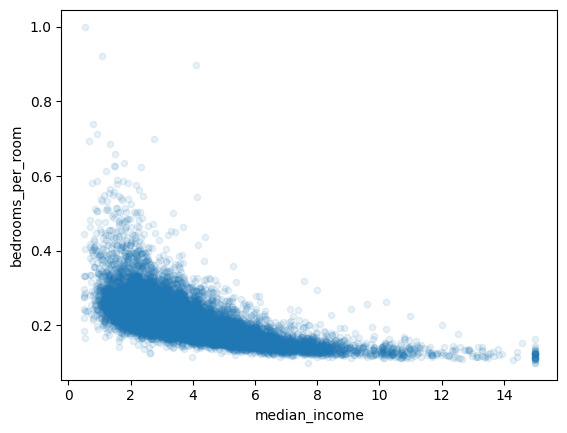

In [274]:
housing.plot(kind="scatter", x="median_income", y="bedrooms_per_room", alpha=0.1)

In [275]:
#-------------------- prepare data for ml algo

In [276]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [277]:
## we have a problem with total bedrooms having a different count
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   id                  16512 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [278]:
## so we use imputer to generalise some missing data
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(housing_two)

housing_num = housing_two;
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   longitude                         16512 non-null  float64
 1   latitude                          16512 non-null  float64
 2   housing_median_age                16512 non-null  float64
 3   total_rooms                       16512 non-null  float64
 4   total_bedrooms                    16512 non-null  float64
 5   population                        16512 non-null  float64
 6   households                        16512 non-null  float64
 7   median_income                     16512 non-null  float64
 8   median_house_value                16512 non-null  float64
 9   id                                16512 non-null  float64
 10  rooms_per_household               16512 non-null  float64
 11  bedrooms_per_household            16512 non-null  float64
 12  bedr

In [279]:
# first we encode "ocean_proximity" so it can be represented as numbers instead of strings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)

print(encoder.classes_)

## so now:
## INLAND = 1
## NEAR BAY = 3
## ....etc
##
# !!! but problem with above is that ML will think that 1 is similar to 2

# so instead we use 1hot, which just acts as a list of binarys instead
# so now instead of one column with an id, we have a column for each value (INLAND, NEAR BAY etc) 
# with all the values being 0 for a row, except for the one that it's true for
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

## this returns a sparse matrix (much more space efficient)
housing_cat_1hot

# can get a normal numpy array instead using:
# housing_cat_1hot.to_array()

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [280]:

## this will do the above two steps (label encoder and 1hot encoder) in one step
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)

## this will return numpy array by default
housing_cat_1hot

## IMPORTANT NOTE: THIS DOESN'T WORK AS IT SHOULD, JUST USE 1HOT

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [281]:
## can instead get sparse output by adding this to constructor:
#encoder = LabelBinarizer(sparse_output=True)
#housing_cat_1hot_sparse = encoder.fit_transform(housing_cat)
#housing_cat_1hot_sparse

In [282]:
# below is our own custom transformer, that will add 2 or 3 new elements to our set

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs, this will mess things up
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self # nothing to do here, we only care about transform
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., -121421.48, 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., -117196.91, 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., -119004.63, 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., -122681.56, 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., -122661.69, 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., -122100.03, 5.477157360406092,
        3.1725888324873095]], dtype=object)

In [283]:
# Okay we now need to scale the features, so the ranges aren't 
# as wide between the different attributes

# We use StandardScaler() for this (although MinMaxScaler also exists)

# Also, this has been a lot of steps in a very specific order. We'll create a pipeline
# to keep track of what we're doing

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [287]:
# Okay, we have one pipeline, pretty cool
# But we can have pipelines within pipelines! using featureUnion

## !! BUT first, we need to add a dataFrameSelector. This is a simple step in our
# pipelines that will select all the attributes we want and throw others away. It will
# also convert the dataFrame into a numpy array 
#(sklearn can only understand np arrays, not pd dataframes)

from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names].values

# okay, onto the pipelines...

from sklearn.pipeline import FeatureUnion

# just reomving un-needed data....
housing_num_without_rounded = housing_num.drop("population_per_household_rounded", axis=1)

num_attribs = list(housing_num_without_rounded)
cat_attribs = ["ocean_proximity"] 

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('one_hot_encoder', OneHotEncoder(sparse_output=False)),
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ('num_pipeline', num_pipeline),
        ('cat_pipeline', cat_pipeline),
    ])

## okay something went a bit weird here
# making housing 3 with all attribs
housing_three = housing
housing_three["median_house_value"] = housing_two["median_house_value"]
housing_three["rooms_per_household"] = housing_two["rooms_per_household"]
housing_three["bedrooms_per_household"] = housing_two["bedrooms_per_household"]
housing_three["bedrooms_per_room"] = housing_two["bedrooms_per_room"]
housing_three["population_per_household"] = housing_two["population_per_household"]



housing_prepared = full_pipeline.fit_transform(housing_three)
housing_prepared

#housing_three.info()


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [291]:
# Ok finally can actually do ML

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_prepared_data = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_prepared_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 72100. 279600.  82700. 112500. 238300.]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [292]:
# measure how well this does

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE:", lin_rmse, "MSE:", lin_mse)

RMSE: 9.032406930514612e-11 MSE: 8.158437495840839e-21


In [293]:
## Okay, not sure if thats good? we'll use cross validation to check
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("StdDiv:", scores.std())

display_scores(rmse_scores)

Scores: [1.85545469e-10 1.27098388e-10 1.66627039e-10 1.69555591e-10
 7.96960758e-11 1.28175768e-10 1.65309800e-10 1.48178279e-10
 1.60251252e-10 1.38444494e-10]
Mean: 1.4688821566362362e-10
StdDiv: 2.8714590629321653e-11


In [294]:
# Final predictions

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = lin_reg.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 48,209.6

KeyError: "['median_house_value', 'rooms_per_household', 'bedrooms_per_household', 'bedrooms_per_room', 'population_per_household'] not in index"